# Estadística con Python

### GitHub repository: https://github.com/jorgemauricio/python_statistics

### Instructor: Jorge Mauricio

## Regresión Multivariable


In [8]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# leer csv con información del libro azul de carros
df = pd.read_csv("data/informacion_carros.csv")
df.head()

,Precio_dlls,Kilometraje,Marca,Modelo,Clasificacion,Tipo,Cilindros,Litros,Puertas,Cruzero,Sonido,Piel
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Hay que recordar que las regresiones no funcionan muy bien con valores ordinarios, es por eso que vamos convertir estos valores en un orden que pueda tener sentido.

## Feature Scaling


In [11]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Kilometraje', 'Cilindros', 'Puertas']]
y = df['Precio_dlls']

X[['Kilometraje', 'Cilindros', 'Puertas']] = scale.fit_transform(X[['Kilometraje', 'Cilindros', 'Puertas']].as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

/home/jorge/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jorge/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jorge/anaconda3/lib/python3.6/si

     Kilometraje  Cilindros   Puertas
0      -1.417485   0.527410  0.556279
1      -1.305902   0.527410  0.556279
2      -0.810128   0.527410  0.556279
3      -0.426058   0.527410  0.556279
4       0.000008   0.527410  0.556279
5       0.293493   0.527410  0.556279
6       0.335001   0.527410  0.556279
7       0.382369   0.527410  0.556279
8       0.511409   0.527410  0.556279
9       0.914768   0.527410  0.556279
10     -1.171368   0.527410  0.556279
11     -0.581834   0.527410  0.556279
12     -0.390532   0.527410  0.556279
13     -0.003899   0.527410  0.556279
14      0.430591   0.527410  0.556279
15      0.480156   0.527410  0.556279
16      0.509822   0.527410  0.556279
17      0.757160   0.527410  0.556279
18      1.594886   0.527410  0.556279
19      1.810849   0.527410  0.556279
20     -1.326046   0.527410  0.556279
21     -1.129860   0.527410  0.556279
22     -0.667658   0.527410  0.556279
23     -0.405792   0.527410  0.556279
24     -0.112796   0.527410  0.556279
25     -0.04

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Precio_dlls   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           2.23e-11
Time:                        16:04:01   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Kilometraje -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cilindros    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Puertas     -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y.groupby(df["Puertas"]).mean()

Puertas
2    23807.135520
4    20580.670749
Name: Precio_dlls, dtype: float64

In [14]:
import seaborn as sns

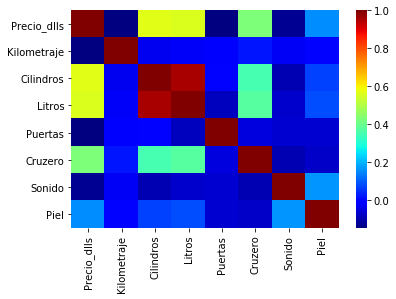

In [20]:
sns.heatmap(df.corr(), cmap="jet")